In [1]:
#https://colab.research.google.com/github/skorch-dev/skorch/blob/feature/triplet-loss-example/notebooks/triplet_loss.ipynb#scrollTo=-Op4moVEe_o4
from misc import *

In [2]:
DATASET = "dataset"
testing = "testing"

In [3]:
output_folder_all = "embedding_all.csv"
output_folder_train = "train_embedding.csv"
output_folder_valid = "valid_embedding.csv"
output_folder_test = "test_embedding.csv"
max_triplets = 7
batch_size= 8
validation_split=0.2
input_shape = (128, 128, 3)
modeling = ResNet152
lr = 10e-06
epochs = 20

In [4]:
fontsize= 14 
linewidth= 2

In [5]:
sika_folders = [os.path.join(DATASET, folder_name)
                  for folder_name in os.listdir(DATASET)]

anchors, positives, negatives = triplets(sika_folders, max_triplets= max_triplets)

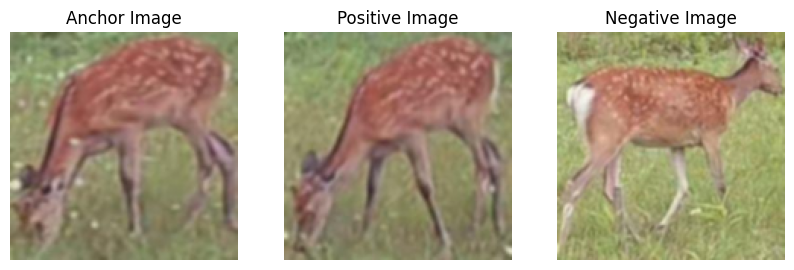

In [6]:
sample_index = random.randint(0, len(anchors) - 1)
visualize_triplets(anchors[sample_index], positives[sample_index], negatives[sample_index], (150, 150))

In [7]:
train_triplets, val_triplets = split_triplets(anchors, positives, negatives, validation_split=validation_split)

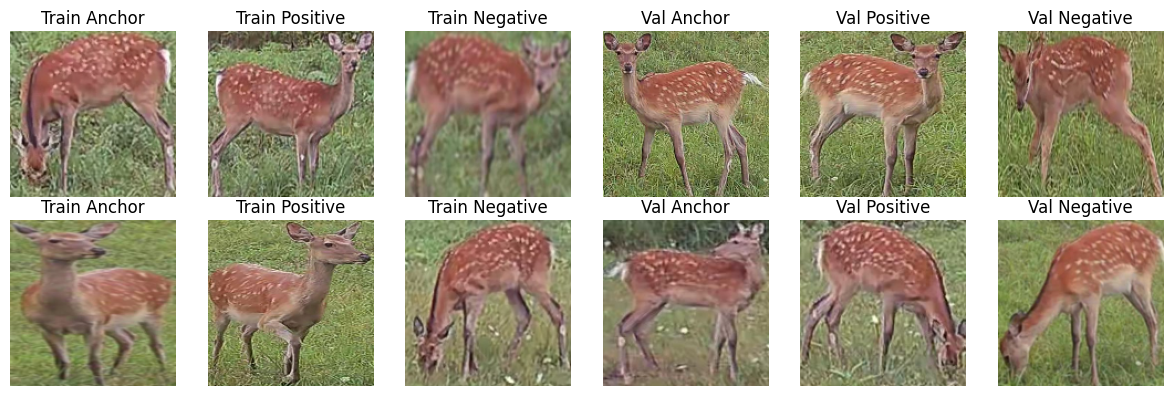

In [8]:
visualize_triplet_samples(train_triplets, val_triplets, num_samples=2, target_size= (150, 150))

In [9]:
train_generator = batch_generator(train_triplets, batch_size=batch_size, augment=True)

In [10]:
val_generator = batch_generator(val_triplets, batch_size=batch_size, augment=True)

In [11]:
num_batches_to_print = 7
# Iterate over the generator and print batches
for i, batch in enumerate(train_generator):
    anchor_batch, positive_batch, negative_batch = batch
    print(f"Batch {i + 1}:")
    print(f"Anchor batch shape: {anchor_batch.shape}")
    print(f"Positive batch shape: {positive_batch.shape}")
    print(f"Negative batch shape: {negative_batch.shape}")
    
    # Optionally, you can break the loop after a certain number of batches
    if i == num_batches_to_print - 1:
         break

Batch 1:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)
Batch 2:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)
Batch 3:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)
Batch 4:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)
Batch 5:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)
Batch 6:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)
Batch 7:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)


In [12]:
num_batches_to_print = 7
# Iterate over the generator and print batches
for i, batch in enumerate(val_generator):
    anchor_batch, positive_batch, negative_batch = batch
    print(f"Batch {i + 1}:")
    print(f"Anchor batch shape: {anchor_batch.shape}")
    print(f"Positive batch shape: {positive_batch.shape}")
    print(f"Negative batch shape: {negative_batch.shape}")
    
    # Optionally, you can break the loop after a certain number of batches
    if i == num_batches_to_print - 1:
         break

Batch 1:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)
Batch 2:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)
Batch 3:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)
Batch 4:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)
Batch 5:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)
Batch 6:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)
Batch 7:
Anchor batch shape: (8, 128, 128, 3)
Positive batch shape: (8, 128, 128, 3)
Negative batch shape: (8, 128, 128, 3)


In [13]:
embedding = get_embedding(input_shape = input_shape, modeling = modeling)
embedding.summary()

Model: "Embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 batch_normalization_94 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                         

In [14]:
anchor_input = Input(name='anchor', shape=input_shape)
positive_input = Input(name='positive', shape=input_shape)
negative_input = Input(name='negative', shape=input_shape)

In [15]:
distances = DistanceLayer()(
    embedding(preprocess_input(anchor_input)),
    embedding(preprocess_input(positive_input)),
    embedding(preprocess_input(negative_input))
)

In [16]:
siamese_net = Model(
    inputs=[anchor_input,
            positive_input,
            negative_input],
    outputs=distances
)

In [17]:
siamese_net.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 anchor (InputLayer)            [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 positive (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 negative (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                            

In [18]:
# Record start time
start_time = time.time()

# Assuming the following functions and objects are defined
siamese_model = SiameseModel(siamese_net)
siamese_model.compile(optimizer=Adam(lr))

siamese_model, history = train_model(siamese_model,
                                     train_triplets=train_triplets,
                                     epochs=epochs,
                                     batch_size=batch_size,
                                     val_triplets=val_triplets)

# Record end time
end_time = time.time()

# Calculate duration
duration = end_time - start_time

In [19]:
# Print timing information
print("Start Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time)))
print("End Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time)))
print("Duration:", duration, "seconds")

In [20]:
print(history)

In [21]:
# Extract relevant information from history object
train_loss = history['loss']
val_loss = history['val_loss']
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

In [22]:
# # Combine the data into a dictionary
data = {
    'Train Loss': train_loss,
    'Val Loss': val_loss,
    'Train Accuracy': train_accuracy,
    'Val Accuracy': val_accuracy
}

In [ ]:
save_metrics_to_csv(data, 'loss_accuracy.csv')

In [24]:
plot_model_history(history, fontsize= fontsize, linewidth= linewidth)

In [25]:

# Now call the visualize_triplet_after_train function with the iterator
visualize_triplet_after_train(val_generator, embedding)

In [36]:
# Get the 'Embedding' layer from the siamese_net model
embedding_layer = siamese_model.siamese_net.get_layer('Embedding')

In [37]:
# Example usage:
training, validation = save_anchor_positive_images(train_triplets, val_triplets)

In [38]:
print("Validation directory:", validation)  
print("Training directory:", training)  

In [39]:
valid = "valid"
train = "train"

In [40]:
# # Assuming validation is a list of file paths
class_paths_valid = [os.path.join(valid, class_name) for class_name in os.listdir(valid) if os.path.isdir(os.path.join(valid, class_name))]
class_paths_all = [os.path.join(DATASET, class_name) for class_name in os.listdir(DATASET) if os.path.isdir(os.path.join(DATASET, class_name))]
class_paths_test = [os.path.join(testing, class_name) for class_name in os.listdir(testing) if os.path.isdir(os.path.join(testing, class_name))]
class_paths_train = [os.path.join(train, class_name) for class_name in os.listdir(train) if os.path.isdir(os.path.join(train, class_name))]

In [41]:
visualize_embeddings(class_paths_all, embedding_layer)

In [42]:
visualize_embeddings(class_paths_train, embedding_layer)

In [43]:
visualize_embeddings(class_paths_valid, embedding_layer)

In [44]:
visualize_embeddings(class_paths_test, embedding_layer)

In [45]:
save_embeddings_to_csv(class_paths_all, embedding_layer, output_folder_all)

In [46]:
save_embeddings_to_csv(class_paths_train, embedding_layer, output_folder_train)

In [47]:
save_embeddings_to_csv(class_paths_valid, embedding_layer, output_folder_valid)

In [48]:
save_embeddings_to_csv(class_paths_test, embedding_layer, output_folder_test)